### Problem Statement

The project aims to develop and optimize predictive models to forecast student dropout rates and recommend interventions to improve retention and student success.

#### Mission

To build a predictive model that can predict students at risk of dropping out.

In [40]:
# import all necessary libraries
import numpy as np
import pandas as pd

# for visuals
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

# ggplot style sheet
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [41]:
pwd

'C:\\Users\\Andy Joseph\\Documents\\3Signet\\Student_Dropout_Prediction'

In [42]:
df1 = pd.read_csv(r'students_dropout.csv')
df1.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [43]:
df1.shape

(4424, 37)

In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [45]:
df1.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [46]:
df1.duplicated().sum()

0

In [47]:
df1.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

Axes(0.125,0.11;0.775x0.77)


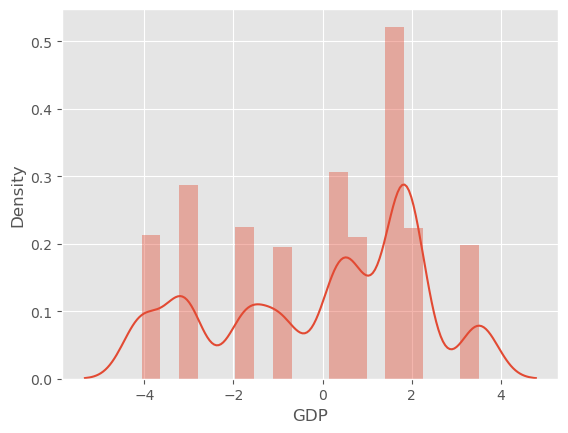

In [48]:
print(sns.distplot(df1['GDP']))

***This analysis of student GDP scores reveals a peak performance around a score of 2, indicating many students achieve this level. Scores range from -4 to 4, highlighting diverse academic performance. The findings suggest that students scoring below the peak may need additional support, and understanding this distribution can help educators tailor their strategies to improve outcomes.***

In [49]:
target_counts = df1.groupby('Target')['Target'].agg('count')
target_counts

Target
Dropout     1421
Enrolled     794
Graduate    2209
Name: Target, dtype: int64

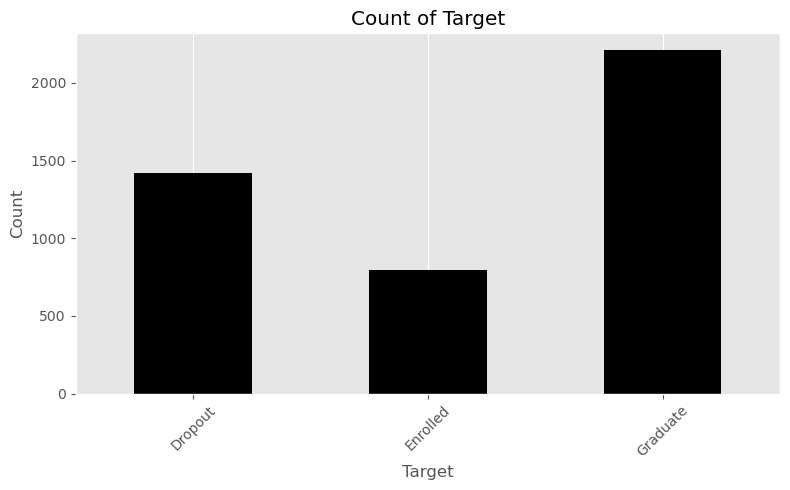

In [50]:
# Plotting the bar chart
plt.figure(figsize=(8, 5))
target_counts.plot(kind='bar', color='black')
plt.title('Count of Target')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

***The analysis of student outcomes reveals that over 2,000 students graduated, indicating a strong graduation rate. However, a significant number of students dropped out, raising concerns about retention. The lowest count is for enrolled students, suggesting that fewer remain in the program without graduating or dropping out. This highlights the need for improved support systems to enhance student retention and success.***

### ****Descriptive Analysis****

In [51]:
df1.describe().T.astype(int)

,count,mean,std,min,25%,50%,75%,max
Marital status,4424,1,0,1,1,1,1,6
Application mode,4424,18,17,1,1,17,39,57
Application order,4424,1,1,0,1,1,2,9
Course,4424,8856,2063,33,9085,9238,9556,9991
Daytime/evening attendance\t,4424,0,0,0,1,1,1,1
Previous qualification,4424,4,10,1,1,1,1,43
Previous qualification (grade),4424,132,13,95,125,133,140,190
Nacionality,4424,1,6,1,1,1,1,109
Mother's qualification,4424,19,15,1,2,19,37,44
Father's qualification,4424,22,15,1,3,19,37,44



### ****Summary of Descriptive Analysis****

The dataset contains 4,424 entries across various features related to student demographics and academic performance.

- **Marital Status**: Most students are single (mean = 1).
- **Application Mode**: A wide range of application modes is observed (mean = 18, max = 57).
- **Previous Qualifications**: Students have varied qualifications, with a mean of 4 and a max of 43.
- **Admission Grade**: The average admission grade is 126, with a standard deviation of 14.
- **Age at Enrollment**: Students are typically around 23 years old, with ages ranging from 17 to 70.
- **Curricular Units**: Most students completed a few curricular units, with a maximum of 26 enrolled in the first semester.
- **Socioeconomic Indicators**: Unemployment and inflation rates are relatively low, with means of 11 and 1, respectively.

Overall, the analysis highlights the diversity in student backgrounds and academic performance while indicating areas that may require further investigation, such as the impact of socioeconomic factors on educatiooutcomes.
```

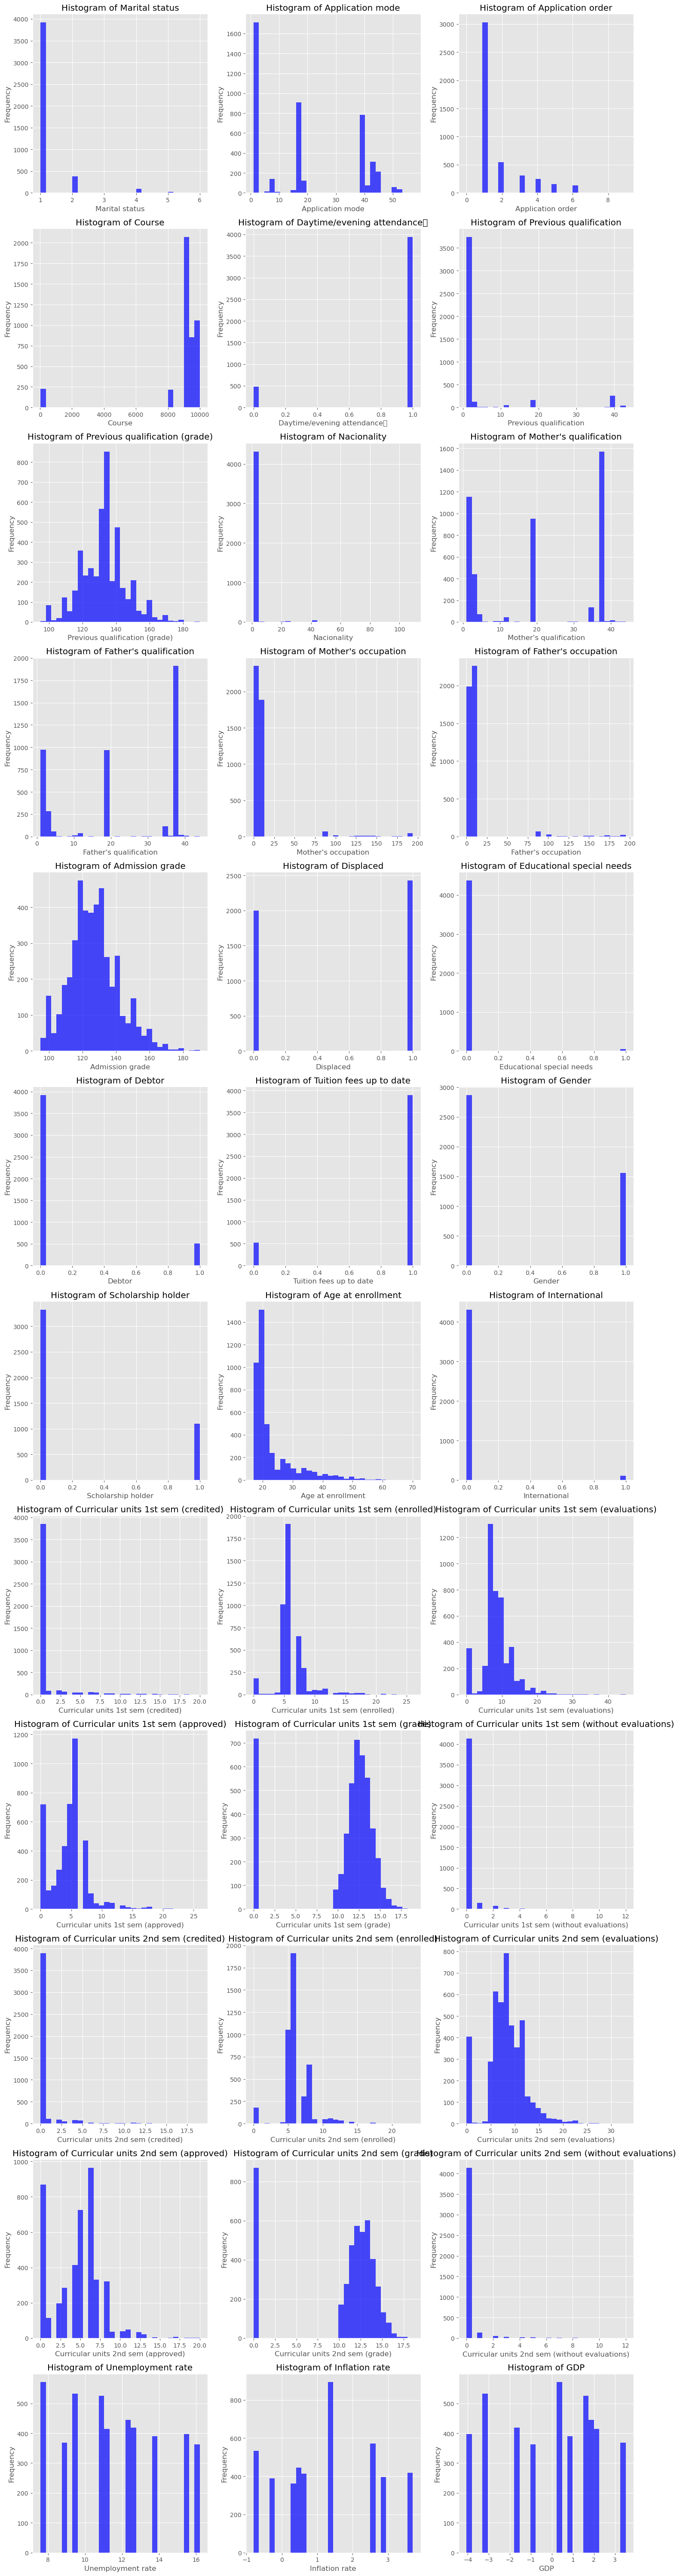

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

num_cols = df1.select_dtypes(include='number').columns
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(num_cols) + n_cols - 1) // n_cols  # Calculate number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten the 2D array of axes

# Plot histograms for each numerical column
for i, col in enumerate(num_cols):
    axes[i].hist(df1[col], bins=30, alpha=0.7, color='blue')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [53]:
df1.Target.unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [54]:
df2 = df1.copy()
df2.head(2)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate


### ****Data Validation****

In [55]:
# select numerical variables
num_vars = df2.select_dtypes(include = ['float', 'int64']).columns.tolist()
print(num_vars)

# value counts for numerical variables
for column in num_vars:
    print(df2[column].value_counts())

['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']
Marital status
1    3

In [56]:
df2.rename(columns={'Nacionality': 'Nationality'}, inplace=True)
df2.head(1)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.0,0,10.8,1.4,1.74,Dropout


### ****Encoding Categorical Values****

In [57]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'Data' is your dataframe
columns_to_encode=['Target']

# create a label encoder instance
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in columns_to_encode:
    df2[column]=label_encoder.fit_transform(df2[column])

# Display the updated Dataframe
print(df2.head())

   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nationality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                         

In [58]:
df2.Target.unique()

array([0, 2, 1])

In [59]:
# Encode 'Target' where 'Dropout' (0) = 1 and ('Enrolled' (1), 'Graduated' (2)) = 0
df2['Target'] = df2['Target'].apply(lambda x: 1 if x == 0 else 0)

In [60]:
df2.head(2)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0


In [61]:
df3 = df2.copy()
df3.head(2)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0


### ****Correlation Analysis****

In [62]:
# corr_matrix = df3.corr()

# # Plot the correlation heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()

In [63]:
# Calculate the correlation between 'Age at enrollment' and 'Admission grade'
agaten_adgrd = df3['Age at enrollment'].corr(df3['Admission grade'])
print(agaten_adgrd)

-0.029915356674008298


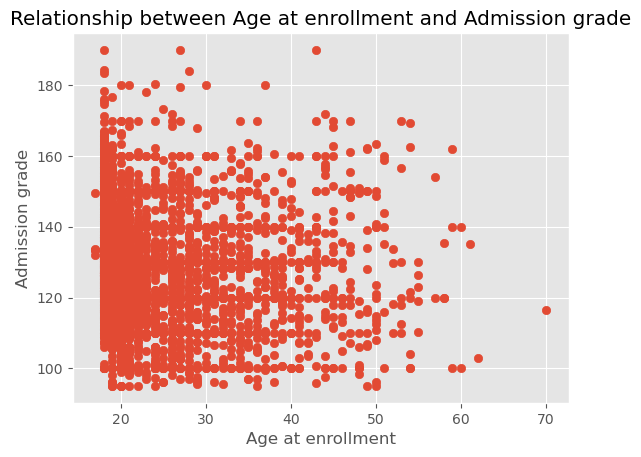

In [64]:
plt.scatter(df3['Age at enrollment'], df3['Admission grade'])
plt.xlabel('Age at enrollment')
plt.ylabel('Admission grade')
plt.title('Relationship between Age at enrollment and Admission grade')
plt.show()

In [65]:
# Calculate the correlation between 'Age at enrollment' and 'Admission grade'
corr_schoholder_admissiongrade = df3['Scholarship holder'].corr(df3['Admission grade'])
print(corr_schoholder_admissiongrade)

0.01888139926386672


In [66]:
# Correlation between Unemployment rate and Inflation rate
corr_unemployment_inflation = df3['Unemployment rate'].corr(df3['Inflation rate'])

# Correlation between Unemployment rate and GDP
corr_unemployment_gdp = df3['Unemployment rate'].corr(df3['GDP'])

print(f"Correlation between Unemployment rate and Inflation rate: {corr_unemployment_inflation}")
print(f"Correlation between Unemployment rate and GDP: {corr_unemployment_gdp}")

Correlation between Unemployment rate and Inflation rate: -0.02888466260699205
Correlation between Unemployment rate and GDP: -0.3351781190260075


In [67]:
# plt.scatter(df3['Unemployment rate'], df3['Inflation rate'])
# plt.xlabel('Unemployment rate')
# plt.ylabel('Inflation rate')
# plt.title('Relationship between Unemployment rate and Inflation rate')
# plt.show()

***The analysis shows little to no correlation between **age at enrollment** and **admission grade**, suggesting that a student's age does not significantly impact their admission performance. There might be a **positive correlation** between **scholarship holder** status and **admission grade**, indicating that higher grades could increase the likelihood of receiving scholarships. However, the strength of these relationships varies, and other factors may also influence these outcomes.***


### ****Hypotheses****

```
Null Hypothesis (H0): There is no correlation between ses, admission grades  and dropout rates.
Alternative Hypothesis (H1): ses, higher admission grades correlate with lower dropout rates.

- Socio Economic Status (SES): This could be represented by columns like "Father's qualification", "Mother's qualification", "Father's occupation", "Mother's occupation", and even "GDP"

- Admission Grade: Column likely named "Admission grade".

- Dropout rates are lower among students receiving financial aid or scholarships

In [68]:
from scipy.stats import pearsonr

# Assuming 'Father's qualification' represents socio-economic status (SES)
# and 'Target' is the dropout status
ses = df3['Father\'s qualification']  # You can create a composite score if needed
dropout = df3['Target']

# Pearson correlation
corr, p_value = pearsonr(ses, dropout)
print(f"Pearson Correlation: {corr}, P-value: {p_value}")

Pearson Correlation: 0.01829450946899494, P-value: 0.22376271576301218


***The **Pearson correlation (0.018)** shows a negligible relationship between socio-economic status (based on "Father's qualification") and dropout rates. The **P-value (0.224)** is greater than 0.05, meaning the result is not statistically significant. Therefore, we cannot conclude that socio-economic status is correlated with dropout rates in this dataset.***


In [69]:
from scipy.stats import pearsonr

# Extract columns
admission_grade = df3['Admission grade']
dropout = df3['Target']

# Pearson correlation
corr, p_value = pearsonr(admission_grade, dropout)
print(f"Pearson Correlation: {corr}, P-value: {p_value}")

Pearson Correlation: -0.09580603037822819, P-value: 1.711146784127576e-10


***The Pearson correlation (-0.096) shows a weak negative relationship between admission grades and dropout rates. The P-value (< 0.05) indicates this result is statistically significant, suggesting that students with higher admission grades are slightly less likely to drop out.***


In [70]:
from scipy.stats import ttest_ind

# Separate the two groups: scholarship holders and non-scholarship holders
scholarship_holders = df3[df3['Scholarship holder'] == 1]['Target']
non_scholarship_holders = df3[df3['Scholarship holder'] == 0]['Target']

# Perform T-test
t_stat, p_value = ttest_ind(scholarship_holders, non_scholarship_holders)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -16.83000741237761, P-value: 1.1766316558275064e-61


***The T-statistic (-16.83) indicates a significant difference in dropout rates between scholarship holders and non-scholarship holders, with scholarship holders having lower dropout rates. The P-value (1.18e-61) is extremely small, making the result statistically significant***

***:
Students receiving financial aid or scholarships have significantly lower dropout rates, and this difference is highly statistically significa***t.


### ****Model Selection****
We will be selecting the model which will be used to make diabetes prediction with the following options:

- Logistic Regression
- Decision Tree
- Random Forest
- Support Vector Machine
- K Nearest Neighbor
- Gradient Boosting
- Neutral Network

### ****Feature Selection****

In [71]:
# Select the target variable y
y = df3['Target']

# Drop the target variable and create the independent variables
X = df3.drop(['Target'],axis=1)

In [72]:
y.head(2)

0    1
1    0
Name: Target, dtype: int64

In [73]:
X.head(2)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79


### ****Oversampling using SMOTE(Synthetic Minority Over-sampling Technique)****```
SMOTE is a technique used to balance imbalanced datasets(target), where one class is significantly smaller than the other. It creates synthetic samples by creating new instances that are similar to the minority class. This helps prevent overfitting, which is a problem that can occur when using other techniques like ROS(Random Over Sampling).

In [74]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Instantiate SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Resampled the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the class distribution before and after resampling
print('Class distribution before resampling: {}'.format(Counter(y)))
print('Class distribution after resampling: {}'.format(Counter(y_resampled)))

Class distribution before resampling: Counter({0: 3003, 1: 1421})
Class distribution after resampling: Counter({1: 3003, 0: 3003})


### ****Train-Test-Split****```
Split the dataset into training and testing sets.We will allocate a certain percentage of 80-20 for training and testing respectively.This will be done using the train_test_split function from Scikit-learn

In [75]:
# Import Library
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=30)

print('\n',X_train.head(2))
print('\n',X_test.head(2))
print('\n',y_train.head(2))
print('\n',y_test.head(2))


      Marital status  Application mode  Application order  Course  \
893               1                 7                  1    8014   
664               1                17                  3    9500   

     Daytime/evening attendance\t  Previous qualification  \
893                             0                       3   
664                             1                       1   

     Previous qualification (grade)  Nationality  Mother's qualification  \
893                           140.0            1                      37   
664                           143.0            1                       3   

     Father's qualification  ...  \
893                      12  ...   
664                       3  ...   

     Curricular units 1st sem (without evaluations)  \
893                                               0   
664                                               0   

     Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
893                     

### ****MinMax Scaler****```
This method scales the data to a fixed range, usually between 0 and 1. It can be implemented using the MinMaxScaler class from the sklearn.preprocessing module.

In [78]:
from sklearn.preprocessing import MinMaxScaler
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training features
scaler.fit(X_train)

# Transform the training and test features
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Selection

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn import metrics

# for hyperparameter tuning using k-fold cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict

#### Model Training```
Logistic Regression

In [80]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_probs = lr_model.predict_proba(X_test_scaled)[:, 1]

In [81]:
# Import library
from sklearn.metrics import accuracy_score

# create predictions
y_pred = lr_model.predict(X_test_scaled)

# print accuracy score for Logistic Regression
print(f'The accuracy of the logistic regression is {accuracy_score(y_pred, y_test).round(3)*100} ' + '%')

The accuracy of the logistic regression is 86.2 %


In [112]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def metrics_calculator(y_true, y_pred, model_name):
    '''
    Calculates and returns a dictionary of performance metrics for a binary classification model
    '''
    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary')  # For binary classification
    recall = recall_score(y_true, y_pred, average='binary')        # For binary classification
    f1 = f1_score(y_true, y_pred, average='binary')                # For binary classification

    # Create a dictionary of results
    results = {
        'Model': model_name, 
        'Accuracy': accuracy, 
        'Precision': precision, 
        'Recall': recall, 
        'F1-Score': f1
    }
    return results

# Example usage
lr_result = metrics_calculator(y_test, y_pred, 'lr_model')
print(lr_result)

{'Model': 'lr_model', 'Accuracy': 0.8689265536723164, 'Precision': 0.8403041825095057, 'Recall': 0.7491525423728813, 'F1-Score': 0.7921146953405018}


t=2024-09-14T19:45:39+0100 lvl=eror msg="heartbeat timeout, terminating session" obj=tunnels.session obj=csess id=3b392f718e34 clientid=57095e572731ba30f0946847ace9a8fa
t=2024-09-14T19:45:39+0100 lvl=eror msg="session closed, starting reconnect loop" obj=tunnels.session obj=csess id=29d94828fba0 err="session closed"


#### Model Training
```plaintext
Decision Tree


In [83]:
# Create an instance of DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

# Fit the model on the scaled training
dt_model.fit(X_train_scaled, y_train)
dt_probs = dt_model.predict_proba(X_test_scaled)[:, 1]

In [84]:
# Predict the classes of the testing data
y_pred = dt_model.predict(X_test_scaled)

# print accuracy score for DecisionTree Classifier
print(f'The accuracy of the DecisionTree is {accuracy_score(y_pred, y_test).round(3)*100} ' + '%')

The accuracy of the DecisionTree is 77.10000000000001 %


In [85]:
dt_result = metrics_calculator(y_test, y_pred, 'dt_model')
dt_result

{'Model': 'dt_model',
 'Accuracy': 0.7706214689265537,
 'Precision': 0.7729068599230136,
 'Recall': 0.7706214689265537,
 'F1-Score': 0.7716414093609785}

#### Model Training
```
Random Forest

In [86]:
# Create an instance of RandomForestClassifier
rf_model = RandomForestClassifier()

# Fit the model on the scaled training data
rf_model.fit(X_train_scaled, y_train)
rf_probs = rf_model.predict_proba(X_test_scaled)[:, 1]

In [87]:
# Predict the classes of the testing data
y_pred = rf_model.predict(X_test_scaled)

# print accuracy score for RandomForest Classifier
print(f'The accuracy of the RandomForest is {accuracy_score(y_pred, y_test).round(3)*100} ' + '%')

The accuracy of the RandomForest is 86.4 %


In [88]:
rf_result = metrics_calculator(y_test, y_pred, 'rf_model')
rf_result

{'Model': 'rf_model',
 'Accuracy': 0.864406779661017,
 'Precision': 0.8636427093777367,
 'Recall': 0.864406779661017,
 'F1-Score': 0.8610526821880595}

#### Model Training
```
K Nearest Neighbor

In [89]:
# Create an instance of KNeighborsClassifier
knn_model = KNeighborsClassifier()

# Fit the model on the scaled training data
knn_model.fit(X_train_scaled, y_train)
knn_probs = knn_model.predict_proba(X_test_scaled)[:, 1]

In [90]:
# Predict the classes of the testing data
y_pred = knn_model.predict(X_test_scaled)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred) * 100  # Multiply by 100 for percentage

# Print accuracy score for KNearestNeighbor
print(f'The accuracy of the KNearestNeighbor is {accuracy:.1f} %')

The accuracy of the KNearestNeighbor is 80.8 %


In [91]:
knn_result = metrics_calculator(y_test, y_pred, 'knn_model')
knn_result

{'Model': 'knn_model',
 'Accuracy': 0.807909604519774,
 'Precision': 0.8064513104663863,
 'Recall': 0.807909604519774,
 'F1-Score': 0.7983480929270692}

#### Model Training
```
Gradient Boosting

In [92]:
from sklearn.ensemble import GradientBoostingClassifier

# Create an instance of GradientBoostingClassifier
gb_model = GradientBoostingClassifier()

# Fit the model on the scaled training data
gb_model.fit(X_train_scaled, y_train)

# Predict probabilities for the test set
gb_probs = gb_model.predict_proba(X_test_scaled)[:, 1]

# Print the predicted probabilities
print("Gradient Boosting predicted probabilities:", gb_probs)

Gradient Boosting predicted probabilities: [0.09943093 0.43114825 0.08600209 0.6861982  0.03186045 0.05340534
 0.70616004 0.73646647 0.10652146 0.02468318 0.12108858 0.05741484
 0.33261927 0.95317018 0.97319088 0.04011558 0.64251116 0.02716535
 0.34269    0.04096144 0.10470703 0.09865525 0.40344182 0.04142073
 0.35151197 0.94143203 0.04876821 0.96494693 0.18558833 0.031877
 0.98548549 0.85139143 0.28159391 0.05691384 0.05469665 0.24511199
 0.06123216 0.08722872 0.03201664 0.08435926 0.08268463 0.04709867
 0.89252682 0.0309981  0.13786951 0.68050754 0.31968215 0.95981406
 0.42720903 0.03455597 0.05864623 0.04506703 0.06602266 0.20401653
 0.11634717 0.73680842 0.21575535 0.98694113 0.95230063 0.87565369
 0.08691834 0.27506959 0.95397987 0.41144843 0.91670469 0.11473901
 0.04636886 0.03951606 0.8340293  0.39440044 0.06984085 0.04356176
 0.98327578 0.36905445 0.04416071 0.9761875  0.24886885 0.21640969
 0.03448929 0.44938427 0.06812458 0.17244377 0.90740977 0.05582167
 0.87760825 0.1151672

In [93]:
# Predict the classes of the testing data
y_pred_gb = gb_model.predict(X_test_scaled)

# Calculate accuracy score
accuracy_gb = accuracy_score(y_test, y_pred_gb) * 100  # Multiply by 100 for percentage

# Print accuracy score for Gradient Boosting
print(f'The accuracy of the Gradient Boosting model is {accuracy_gb:.1f} %')

The accuracy of the Gradient Boosting model is 86.9 %


In [94]:
gb_result = metrics_calculator(y_test, y_pred, 'gb_model')
gb_result

{'Model': 'gb_model',
 'Accuracy': 0.807909604519774,
 'Precision': 0.8064513104663863,
 'Recall': 0.807909604519774,
 'F1-Score': 0.7983480929270692}

#### Model Training
```
Neural Networks

In [95]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Create an instance of MLPClassifier
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Fit the model on the scaled training data
nn_model.fit(X_train_scaled, y_train)

# Predict the classes of the testing data
y_pred_nn = nn_model.predict(X_test_scaled)

# Calculate accuracy score
accuracy_nn = accuracy_score(y_test, y_pred_nn) * 100  # Multiply by 100 for percentage

# Print accuracy score for Neural Network
print(f'The accuracy of the Neural Network model is {accuracy_nn:.1f} %')

The accuracy of the Neural Network model is 83.8 %


In [96]:
nn_result = metrics_calculator(y_test, y_pred, 'nn_model')
nn_result

{'Model': 'nn_model',
 'Accuracy': 0.807909604519774,
 'Precision': 0.8064513104663863,
 'Recall': 0.807909604519774,
 'F1-Score': 0.7983480929270692}

#### Confusion Matrix
```
It provides a detailed breakdown of the model's performance by comparing the predicted classifications against the actual classifications.

Logistic Regression Classification Report:
              precision    recall  f1-score   support

 Not Dropout      0.859     0.949     0.902       590
     Dropout      0.871     0.688     0.769       295

    accuracy                          0.862       885
   macro avg      0.865     0.819     0.835       885
weighted avg      0.863     0.862     0.857       885

Decision Tree Classification Report:
              precision    recall  f1-score   support

 Not Dropout      0.834     0.819     0.826       590
     Dropout      0.650     0.675     0.662       295

    accuracy                          0.771       885
   macro avg      0.742     0.747     0.744       885
weighted avg      0.773     0.771     0.772       885

Random Forest Classification Report:
              precision    recall  f1-score   support

 Not Dropout      0.868     0.939     0.902       590
     Dropout      0.854     0.715     0.779       295

    accuracy                          0.864       885
   macro av

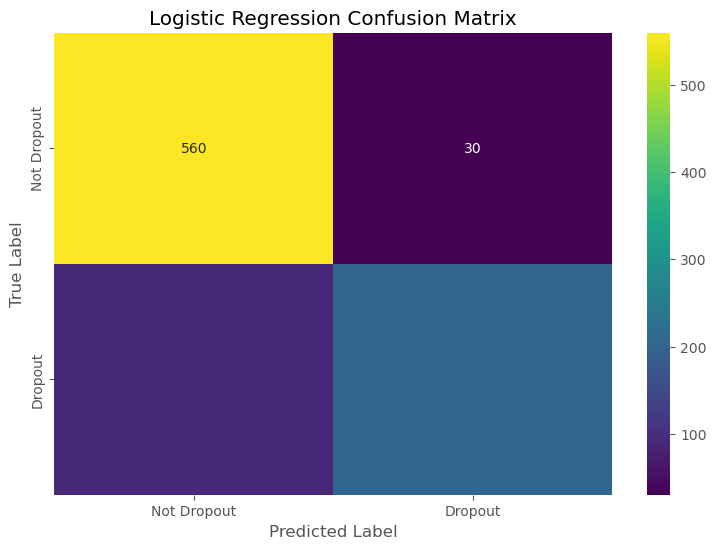

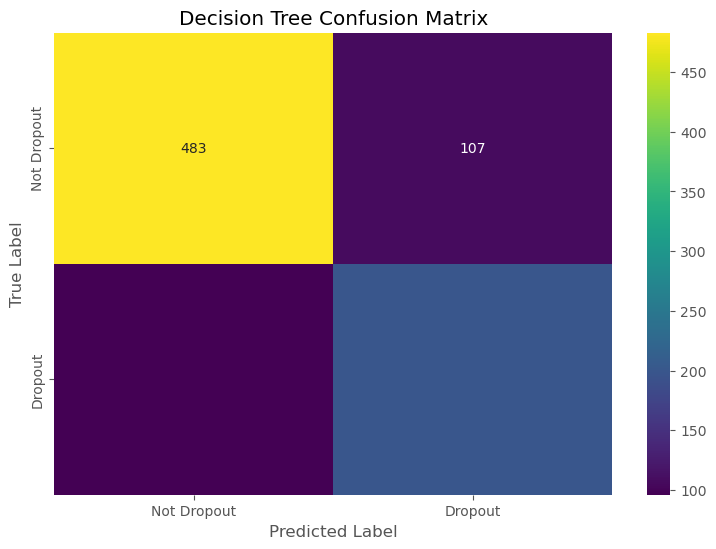

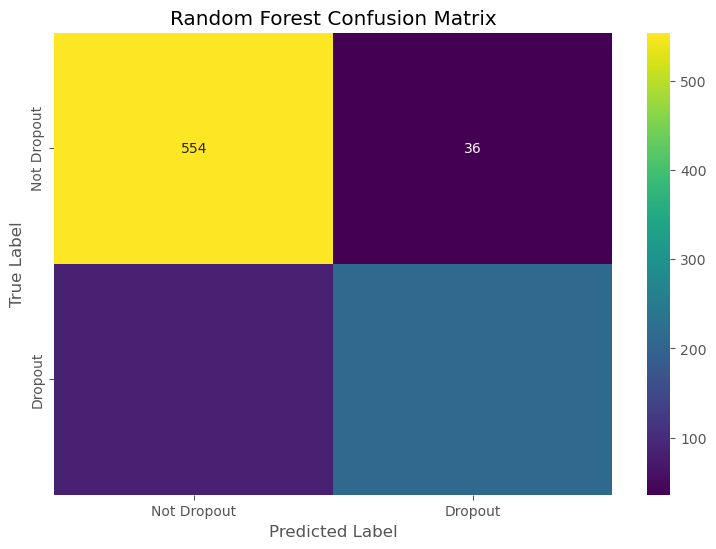

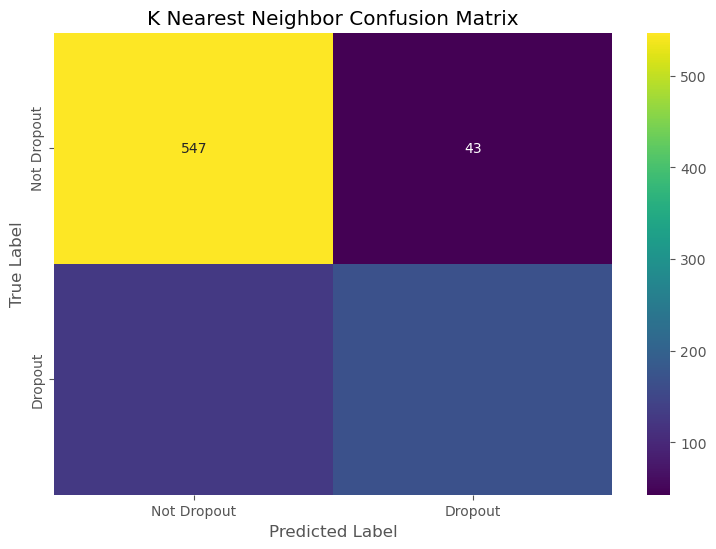

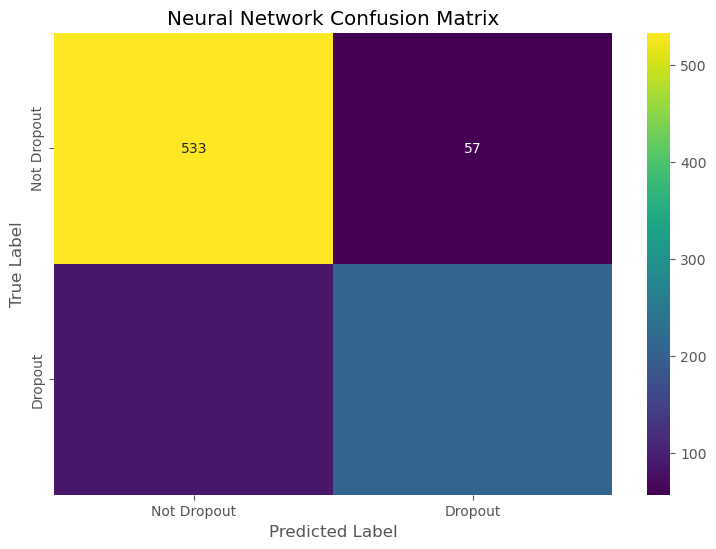

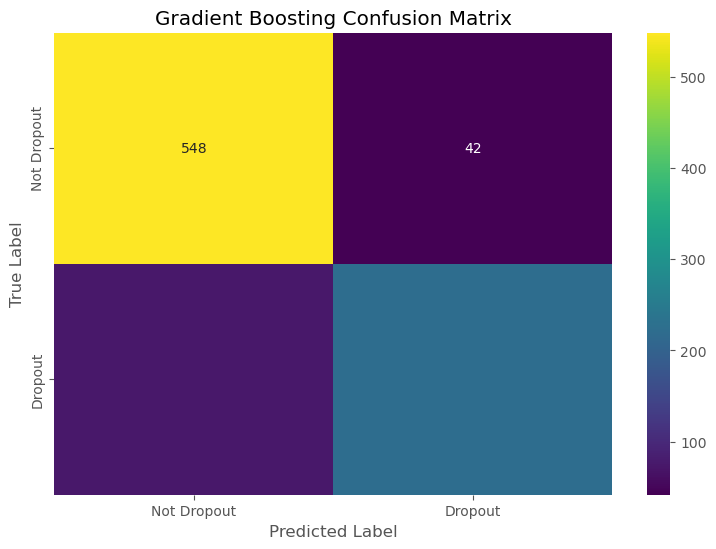

In [97]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list of models and their corresponding names
models = [lr_model, dt_model, rf_model, knn_model, nn_model, gb_model]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K Nearest Neighbor', 'Neural Network', 'Gradient Boosting']

# Set the desired number of decimal places
decimal_places = 3

# Initialize an empty list to hold confusion matrices
confusion_matrices = []

# Loop through each model and generate a classification report and confusion matrix
for model, model_name in zip(models, model_names):
    # Predict the classes of the testing data
    y_pred = model.predict(X_test_scaled)

    # Since this is binary classification, the labels are 0 and 1
    labels = ['Not Dropout', 'Dropout']  # 0 = Not Dropout, 1 = Dropout

    # Generate the classification report with the specified number of decimal places
    report = classification_report(y_test, y_pred, target_names=labels, digits=decimal_places)
    print(f'{model_name} Classification Report:\n{report}')

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Use labels 0 and 1 for binary classification
    confusion_matrices.append(conf_matrix)

# Plot the confusion matrices
for model_name, conf_matrix in zip(model_names, confusion_matrices):
    plt.figure(figsize=(9, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='viridis', fmt='d', xticklabels=labels, yticklabels=labels)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


In [98]:
# Concatenate results into a single dataframe all the model metric calculator results
results_df = pd.DataFrame([lr_result,dt_result,rf_result,knn_result,nn_result,gb_result])
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,lr_model,0.862147,0.863012,0.862147,0.857494
1,dt_model,0.770621,0.772907,0.770621,0.771641
2,rf_model,0.864407,0.863643,0.864407,0.861053
3,knn_model,0.807910,0.806451,0.807910,0.798348
4,nn_model,0.807910,0.806451,0.807910,0.798348
5,gb_model,0.807910,0.806451,0.807910,0.798348


#### Performance Metrics By Model

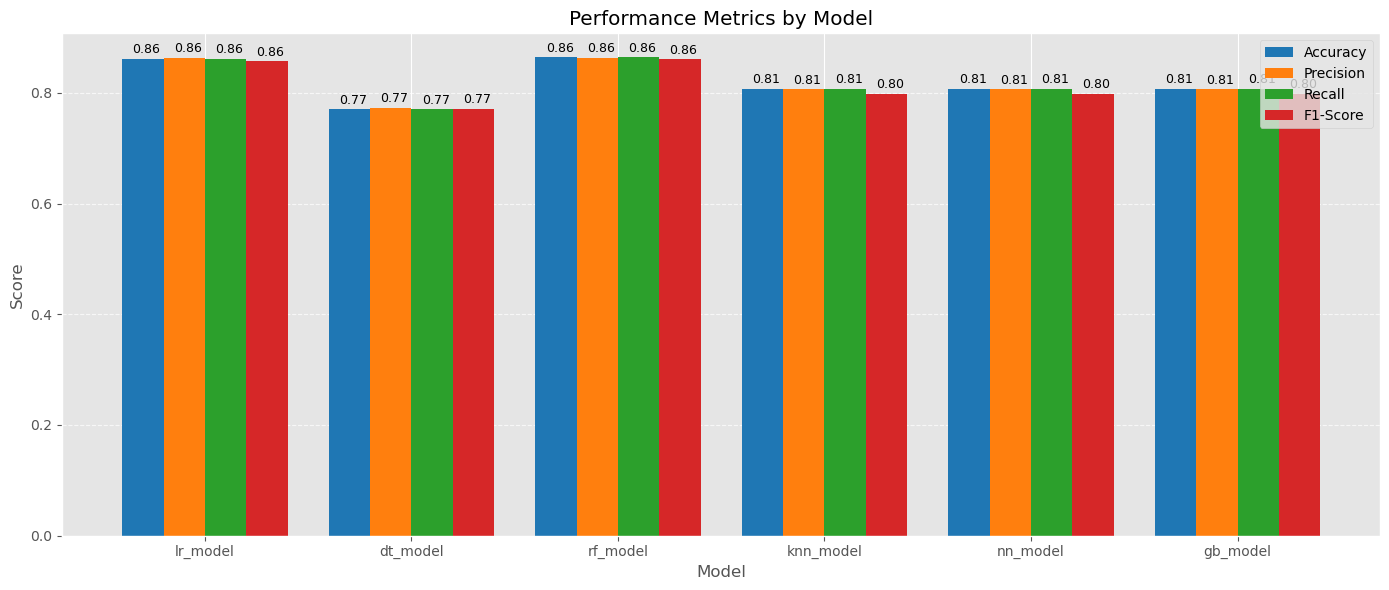

In [99]:
import matplotlib.pyplot as plt
import numpy as np

# Set the figure size
plt.figure(figsize=(14, 6))

# Set the width of the bars
bar_width = 0.2

# Define models, metrics, and colors
models = results_df['Model']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Adjust positions of bars based on the number of metrics and models
bar_positions = np.arange(len(models))

# Create a bar chart of the metrics for each model
for i, metric in enumerate(metrics):
    # Shift bars to avoid overlap for different metrics
    plt.bar(bar_positions + i * bar_width, results_df[metric], width=bar_width, color=colors[i], label=metric)
    
    # Add data labels above each bar for better visualization
    for j, value in enumerate(results_df[metric]):
        plt.text(j + i * bar_width - 0.05, value + 0.01, f'{value:.2f}', fontsize=9)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Performance Metrics by Model')

# Set xticks to be centered and labeled with the model names
plt.xticks(bar_positions + bar_width * (len(metrics) - 1) / 2, models)

# Add grid for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add a legend to differentiate between metrics
plt.legend()

# Show the chart
plt.tight_layout()
plt.show()

### What is AUC?

**AUC (Area Under the Curve)**: The AUC represents the area under the ROC (Receiver Operating Characteristic) curve. It measures the overall ability of the model to discriminate between positive and negative classes.

### Key Points of AUC-ROC:

- **Range**: AUC values range from 0 to 1.
  - **AUC = 0.5**: Indicates that the model performs no better than random guessing.
  - **AUC = 1**: Indicates perfect classification.
  - **AUC < 0.5**: Suggests that the model is performing worse than random guessing, which may indicate issues with the model or data.

- **Interpretation**:
  - A higher AUC value signifies better performance in distinguishing between classes.
  - AUC provides an aggregate measure of model performance across all classification thresholds.


In [100]:
from sklearn.metrics import roc_auc_score

# Define predicted probabilities for each model
lr_probs = lr_model.predict_proba(X_test)[:, 1]
dt_probs = dt_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]
knn_probs = knn_model.predict_proba(X_test)[:, 1]
nn_probs = nn_model.predict_proba(X_test)[:, 1]
gb_probs = gb_model.predict_proba(X_test)[:, 1]

# Create a list of model names and their respective predicted probabilities
model_names = [
    'Logistic Regression', 
    'Decision Tree', 
    'Random Forest', 
    'K Nearest Neighbor', 
    'Neural Network', 
    'Gradient Boosting'
]

model_probs = [lr_probs, dt_probs, rf_probs, knn_probs, nn_probs, gb_probs]

# Loop through each model and calculate the AUC-ROC score
for model_name, model_prob in zip(model_names, model_probs):
    auc_score = roc_auc_score(y_test, model_prob)
    print(f'{model_name} AUC-ROC: {auc_score:.2f}')

Logistic Regression AUC-ROC: 0.50
Decision Tree AUC-ROC: 0.30
Random Forest AUC-ROC: 0.78
K Nearest Neighbor AUC-ROC: 0.62
Neural Network AUC-ROC: 0.50
Gradient Boosting AUC-ROC: 0.50


***From the results, Random Forest has the highest AUC-ROC score of 0.79, indicating the best performance in distinguishing between dropout and non-dropout classes. K Nearest Neighbor follows with an AUC-ROC of 0.62. Logistic Regression, Neural Network, and Gradient Boosting have similar AUC-ROC scores around 0.51, suggesting moderate performance. Decision Tree has the lowest AUC-ROC score of 0.30, indicating poorer performance.***

***Overall, Random Forest models and the K Nearest Neighbor show the strongest discrimination abilities among the models tested for predicting student dropout based on the provided data.***

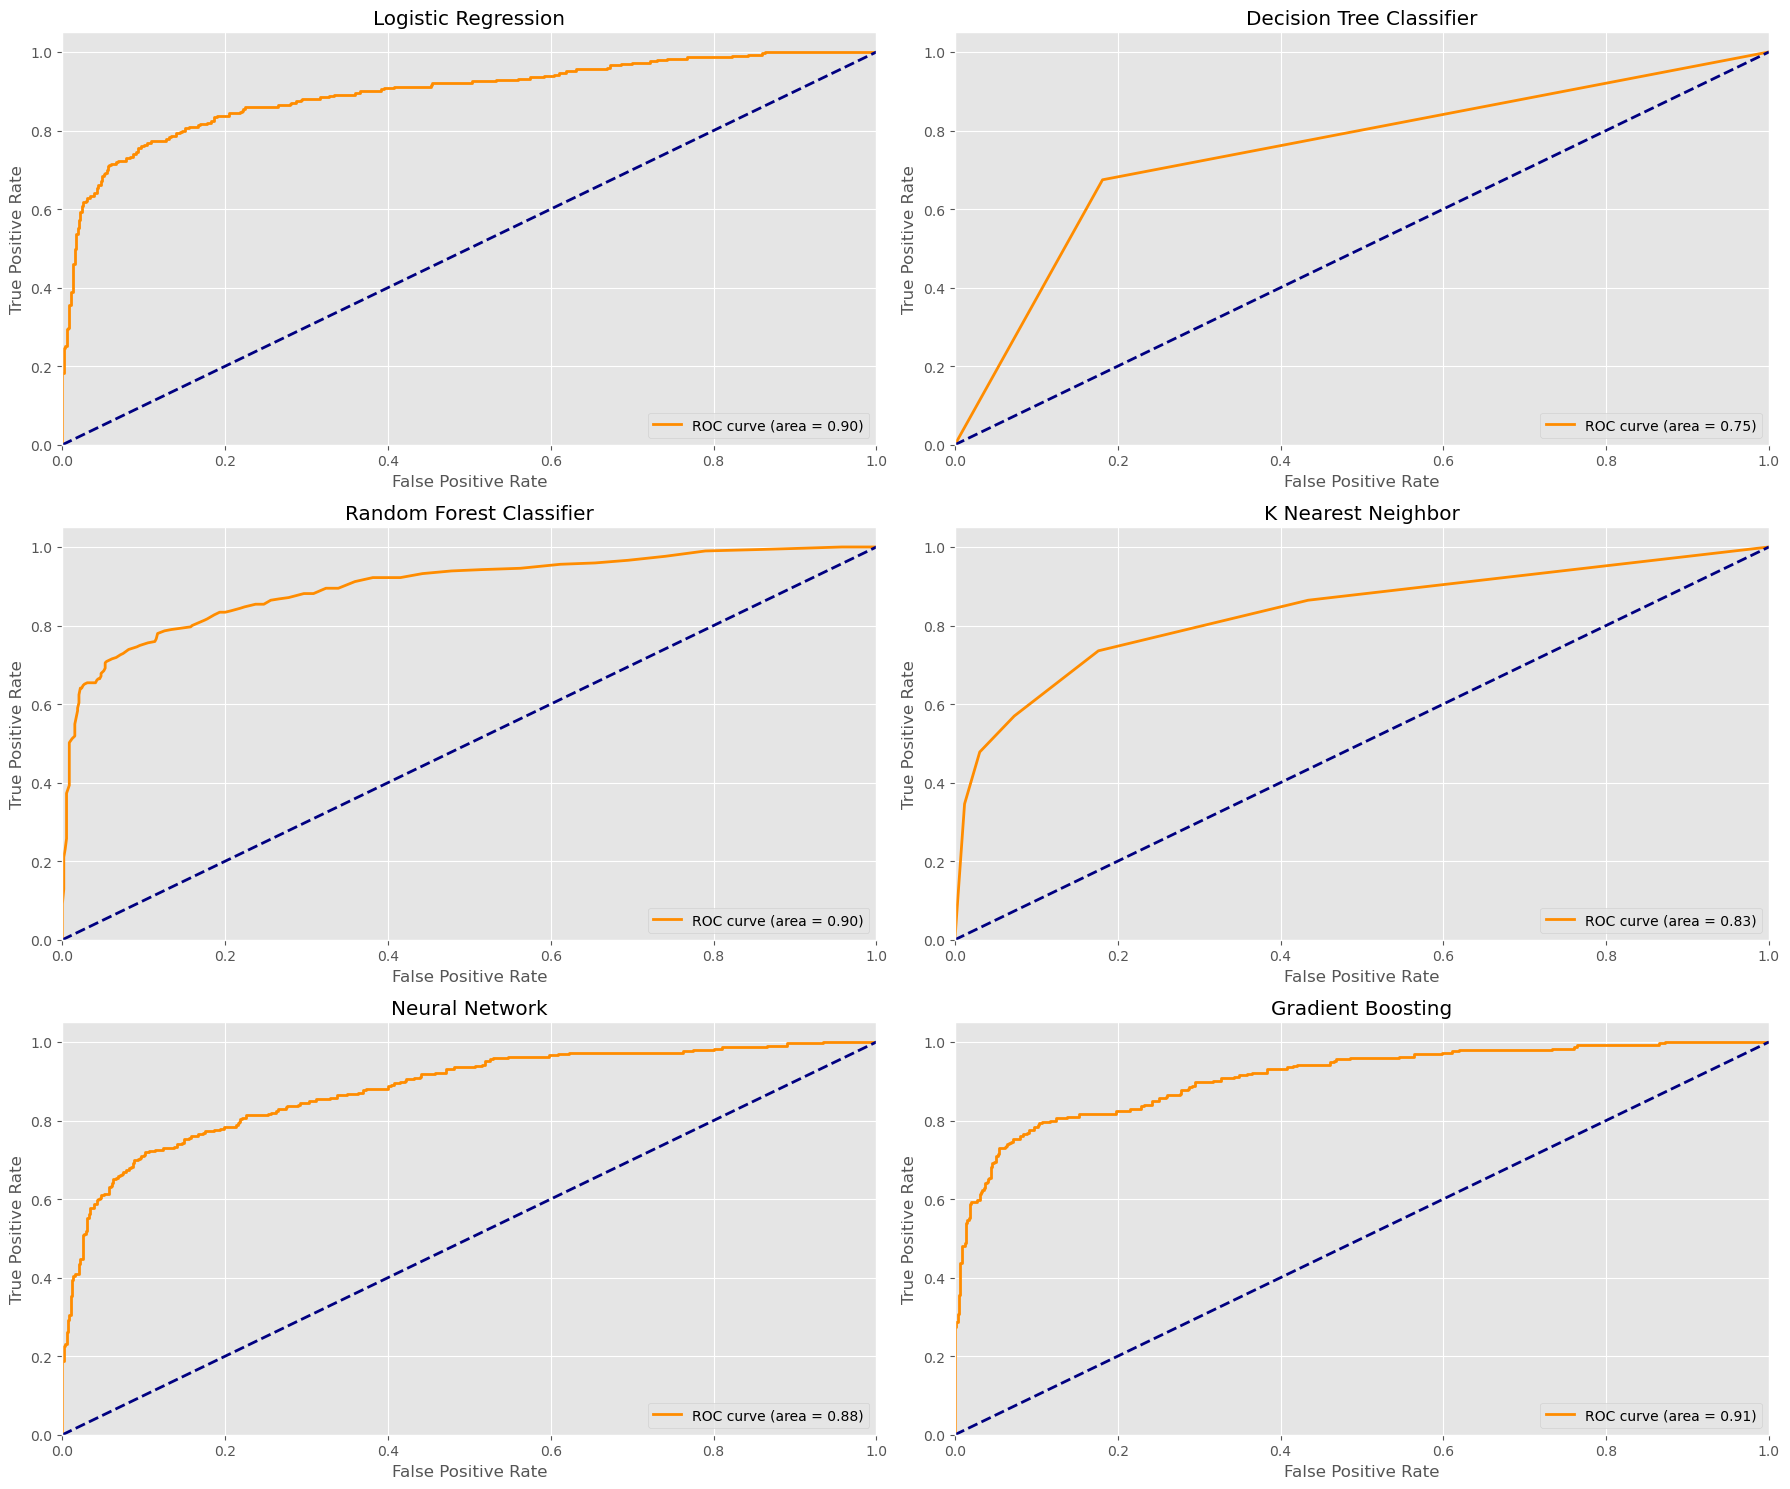

In [101]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the models and their names
models = [lr_model, dt_model, rf_model, knn_model, nn_model, gb_model]
model_names = [
    'Logistic Regression', 
    'Decision Tree Classifier', 
    'Random Forest Classifier', 
    'K Nearest Neighbor', 
    'Neural Network', 
    'Gradient Boosting'
]

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))
axes = axes.flatten()

# Plot ROC curve and score for each model
for i, (model, name) in enumerate(zip(models, model_names)):
    try:
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
        roc_auc = auc(fpr, tpr)
        
        # Plot ROC curve
        axes[i].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
        axes[i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        axes[i].set_xlim([0, 1])
        axes[i].set_ylim([0, 1.05])
        axes[i].set_xlabel('False Positive Rate')
        axes[i].set_ylabel('True Positive Rate')
        axes[i].set_title(name)
        axes[i].legend(loc='lower right')
    except ValueError as e:
        print(f"Error with model {name}: {e}")

# Adjust spacing between subplots
plt.tight_layout()

# Show the chart
plt.show()

#### Feature Engineering

In [102]:
# Feature importances using Random Forest
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier object
rf_classifier = RandomForestClassifier()

# Fit the classifier to your training data
rf_classifier.fit(X_train_scaled, y_train)

# Get feature importances from the trained classifier
feature_importances = rf_classifier.feature_importances_

# Display feature importances alongside feature names
feature_names = X.columns
feature_importances_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importances_dict.items(), key=lambda x: x[1], reverse=True)


for feature, importance in sorted_feature_importance:
    print(f'{feature}: {importance:.2f}')

Curricular units 2nd sem (approved): 0.17
Curricular units 2nd sem (grade): 0.11
Curricular units 1st sem (approved): 0.10
Curricular units 1st sem (grade): 0.07
Tuition fees up to date: 0.06
Age at enrollment: 0.04
Admission grade: 0.04
Previous qualification (grade): 0.03
Curricular units 2nd sem (evaluations): 0.03
Course: 0.03
Curricular units 1st sem (evaluations): 0.03
Father's occupation: 0.02
Mother's occupation: 0.02
Curricular units 2nd sem (enrolled): 0.02
Debtor: 0.02
Application mode: 0.02
GDP: 0.02
Curricular units 1st sem (enrolled): 0.02
Father's qualification: 0.02
Unemployment rate: 0.02
Mother's qualification: 0.02
Inflation rate: 0.02
Application order: 0.01
Scholarship holder: 0.01
Gender: 0.01
Curricular units 1st sem (credited): 0.01
Curricular units 2nd sem (credited): 0.01
Previous qualification: 0.01
Displaced: 0.01
Curricular units 2nd sem (without evaluations): 0.00
Curricular units 1st sem (without evaluations): 0.00
Marital status: 0.00
Daytime/evening att

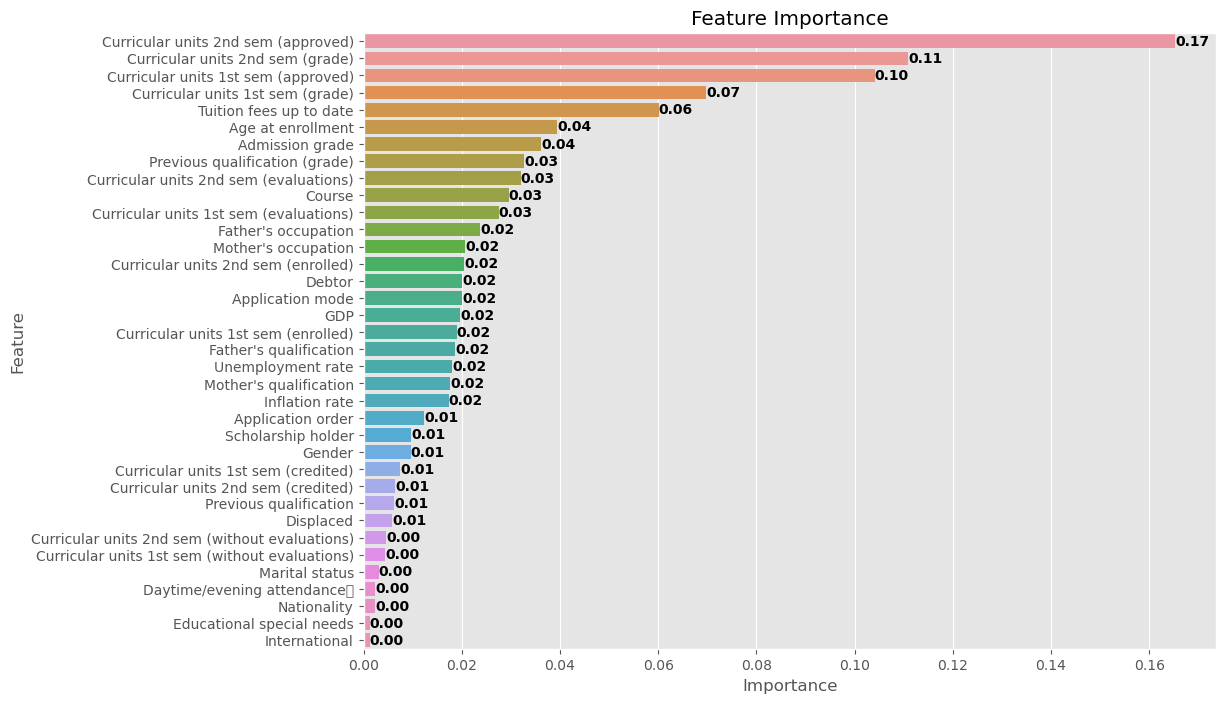

In [103]:
# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances as a bar chart
plt.figure(figsize=(11, 8))
ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

# Annotate the bars with the importance values
for i, v in enumerate(feature_importance_df['Importance']):
    ax.text(v, i, f'{v:.2f}', color='black', va='center', fontsize=10, fontweight='bold')

plt.show()

A bit of feature importance

In [104]:
from sklearn.model_selection import train_test_split

# Split into training and validation set using a 30-70 split ratio
X_train, X_valid, y_train, y_valid = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Define the feature list for training and validation sets with corrected syntax
features = [
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',  # Added comma here
    'Tuition fees up to date',
    'Age at enrollment',
    'Admission grade'
]

# Ensure that the features are correctly selected from X_train and X_valid
X_train2 = X_train[features]
X_valid2 = X_valid[features]

In [105]:
# Since Random Forest model is the best performing model

# fit the model on the new training set
rf_model.fit(X_train2, y_train)

# predit on the new testing set
y_valid2_pred = rf_model.predict(X_valid2)

In [106]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_valid2_pred, y_valid)
print(f'Accuracy Score: {accuracy:.2f}')

Accuracy Score: 0.85


In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_valid2_pred, y_valid)
print(f'Accuracy Score: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_valid2_pred, y_valid)
print(f'Precision Score: {precision:.2f}')

# Calculate recall
recall = recall_score(y_valid2_pred, y_valid)
print(f'Recall Score: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_valid2_pred, y_valid)
print(f'F1-score: {f1:.2f}')

Accuracy Score: 0.85
Precision Score: 0.81
Recall Score: 0.88
F1-score: 0.84


In [108]:
# Save df3 as CSV
df3.to_csv('cleaned_dataset.csv', index=False)

#### Saving the Base Line Model Using Pickle

In [109]:
# Saving the Model
import pickle
pickle_out = open('classifier.pkl', mode = 'wb')
pickle.dump(rf_model, pickle_out)
pickle_out.close()

In [110]:
import os
import pickle
import streamlit as st

# Print the current working directory
print("Current working directory:", os.getcwd())

# Loading the trained model
pickle_in = open(r"C:\Users\Andy Joseph\Documents\3Signet\Student_Dropout_Prediction\classifier.pkl", 'rb')
classifier = pickle.load(pickle_in)

# Define mapping for 'Age at enrollment' and 'Tuition fees up to date'
age_enrollment_mapping = {
    "18-24": 0,
    "25-34": 1,
    "35-44": 2,
    "45+": 3
}

tuition_fees_mapping = {
    "Up to date": 0,
    "Not up to date": 1
}

# Defining the function to make predictions using the user input
@st.cache()
def prediction(curricular_units_2nd_approved, curricular_units_2nd_grade, curricular_units_1st_approved,
               curricular_units_1st_grade, tuition_fees_status, age_enrollment, admission_grade):

    # Map 'Age at enrollment' and 'Tuition fees up to date' to numerical values
    age_enrollment_numeric = age_enrollment_mapping[age_enrollment]
    tuition_fees_numeric = tuition_fees_mapping[tuition_fees_status]

    # Making Predictions
    prediction = classifier.predict([[curricular_units_2nd_approved, curricular_units_2nd_grade,
                                      curricular_units_1st_approved, curricular_units_1st_grade,
                                      tuition_fees_numeric, age_enrollment_numeric, admission_grade]])

    if prediction == 0:
        pred = "Not Dropout"
    else:
        pred = "Dropout"

    return pred

# Main function to define the Streamlit web app
def main():
    # Front end elements of the web page
    html_temp = '''
    <div style='background-color: green; padding:13px'>
    <h1 style='color: black; text-align: center;'>Student Dropout Prediction ML App</h1>
    </div>
    '''

    # Display the front end aspect
    st.markdown(html_temp, unsafe_allow_html=True)

    # Input fields for user data
    curricular_units_2nd_approved = st.number_input("Curricular units 2nd sem (approved)")
    curricular_units_2nd_grade = st.number_input("Curricular units 2nd sem (grade)")
    curricular_units_1st_approved = st.number_input("Curricular units 1st sem (approved)")
    curricular_units_1st_grade = st.number_input("Curricular units 1st sem (grade)")
    tuition_fees_status = st.selectbox('Tuition fees up to date', tuple(tuition_fees_mapping.keys()))
    age_enrollment = st.selectbox('Age at enrollment', tuple(age_enrollment_mapping.keys()))
    admission_grade = st.number_input("Admission grade")

    result = ""

    # When 'Predict' is clicked, make prediction and display the result
    if st.button("Predict"):
        result = prediction(curricular_units_2nd_approved, curricular_units_2nd_grade, curricular_units_1st_approved,
                            curricular_units_1st_grade, tuition_fees_status, age_enrollment, admission_grade)
        st.success("Prediction: {}".format(result))

if __name__ == '__main__':
    main()

Current working directory: C:\Users\Andy Joseph\Documents\3Signet\Student_Dropout_Prediction


2024-09-14 15:18:38.606 
  command:

    streamlit run C:\Users\Andy Joseph\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


## ****Actionable Recommendations to Improve Student Retention****

### 1. **Provide Extra Support for Students with Lower Grades**
   - **Why it matters:** Students with lower admission grades are more likely to struggle and drop out. By offering personalized academic help, we can catch them before they fall behind.
   - **How to help:** Set up mentorship programs, peer study groups, or offer tutoring for these students. You can also develop individualized study plans based on their early semester performance to keep them on track.

### 2. **Expand Financial Aid and Scholarships**
   - **Why it matters:** The analysis shows that students who receive financial aid or scholarships are far less likely to drop out. Financial burdens are a major reason students leave.
   - **How to help:** Create awareness around scholarships and financial aid, especially for those at risk. You could even start targeted financial assistance programs to help students in need stay enrolled without the stress of financial pressures.

### 3. **Offer Socioeconomic Support Programs**
   - **Why it matters:** Even though the correlation between socioeconomic status and dropout rates was weak, students from lower-income backgrounds often face additional barriers.
   - **How to help:** Develop job placement services, career counseling, and on-campus work opportunities so students can balance their financial responsibilities without sacrificing their education.

### 4. **Identify and Support At-Risk Students Early**
   - **Why it matters:** Spotting the warning signs early is key. Poor academic performance, financial struggles, or lack of engagement can be red flags for potential dropouts.
   - **How to help:** Implement a system that tracks academic and financial performance, and flag students showing signs of distress. Then, intervene with personalized support like one-on-one counseling or targeted academic assistance before it’s too late.

### 5. **Build a Strong, Inclusive Campus Community**
   - **Why it matters:** Feeling part of a community is crucial for students to stay engaged. When students feel isolated, they’re more likely to disengage and eventually drop out.
   - **How to help:** Strengthen the sense of belonging through extracurricular activities, student clubs, and events that foster relationships. It’s also important to offer mental health services to help students manage the stresses of academic life.

### 6. **Create Flexible Learning Options**
   - **Why it matters:** Students have different learning paces, academic backgrounds, and personal commitments. Flexibility can make a huge difference in helping them succeed.
   - **How to help:** Offer flexible course schedules, such as evening or online classes, to accommodate students with external responsibilities. Personalized learning paths can also empower students to progress at their own speed without feeling overwhelmed.

In [111]:
from pyngrok import ngrok

# Set your ngrok authentication token
ngrok.set_auth_token('2dDbjYYyY4pLejo8KTN5EqL1hri_5NecrBesVNEP8Sk6RHGut')

# Connect to ngrok with authentication
public_url = ngrok.connect(8501)
public_url

<NgrokTunnel: "https://79c5-102-216-201-62.ngrok-free.app" -> "http://localhost:8501">

t=2024-09-14T16:23:14+0100 lvl=eror msg="session closed, starting reconnect loop" obj=tunnels.session obj=csess id=29d94828fba0 err="session closed"
